<h1> Gradient Enhanced Effective Quadratures I

In this two part tutorial, we demonstrate how we can construct polynomial approximants using effectively subsampled quadratures with gradient evaluations of a model. 

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

Consider the following function and its gradient:
$$f(x_1, x_2) = exp( 2 x_1 + x_2),$$
$$\nabla f=\left(\begin{array}{c}
2 exp( 2 x_1 + x_2) \\
exp( 2 x_1 + x_2) 
\end{array}\right).$$

We start by defining our computational model:

In [2]:
def fun(x):
    return np.exp(2*x[0] + x[1])

def fungrad(x):
    return [2 * np.exp(2 * x[0] + x[1]), np.exp(2 * x[0] + x[1])] 

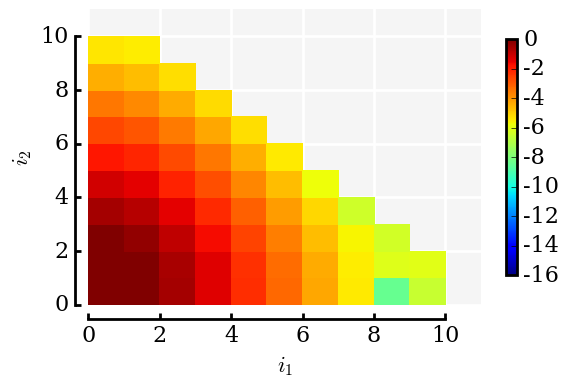

AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
value = 11
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value, derivative_flag=0)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value, derivative_flag=0)
parameters = [x1, x2]
hyperbolic_cross = IndexSet("Total order", orders=[value-1,value-1])

# Without gradients!
esq = Polylsq(parameters, hyperbolic_cross)
esq.set_no_of_evals(esq.no_of_basis_terms) # in effect making it a square system!
x, cond = esq.computeCoefficients(fun)

coeffplot2D(x, hyperbolic_cross.elements, '$i_1$', '$i_2$')
# Now with gradients
#print esq.no_of_basis_terms
esq.set_no_of_evals(20)
x_grad =  esq.computeCoefficients(fun, fungrad,'weighted')

In [ ]:
coeffplot2D(x_grad, hyperbolic_cross.elements, '$i_1$', '$i_2$')

The total number of basis terms in this basis is:

In [ ]:
#esq.set_no_of_evals(evals)
#cols_to_prune = 5
#esq.prune(cols_to_prune)
#x1 =  esq.computeCoefficients(fun, fungrad,'weighted')
#x1b =  esq.computeCoefficients(fun, fungrad,'equality')
#xnew =  x[0:(terms-cols_to_prune)]
#weighted_error = np.linalg.norm(xnew-x1, 2)
#equality_error = np.linalg.norm(xnew-x1b, 2)
#print weighted_error, equality_error